In [1]:
# No need to install anything manually — all used libraries are pre-installed in Colab
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
from google.colab import files
uploaded = files.upload()


Saving spam.csv to spam.csv


In [4]:
# Load only required columns
df = pd.read_csv("spam.csv", encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']
df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
# Encode spam=1, ham=0
df['label'] = df['label'].map({'ham': 0, 'spam': 1})


In [6]:
cv = CountVectorizer()
X = cv.fit_transform(df['message'])
y = df['label']


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [9]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.97847533632287

Confusion Matrix:
 [[952  13]
 [ 11 139]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.91      0.93      0.92       150

    accuracy                           0.98      1115
   macro avg       0.95      0.96      0.95      1115
weighted avg       0.98      0.98      0.98      1115



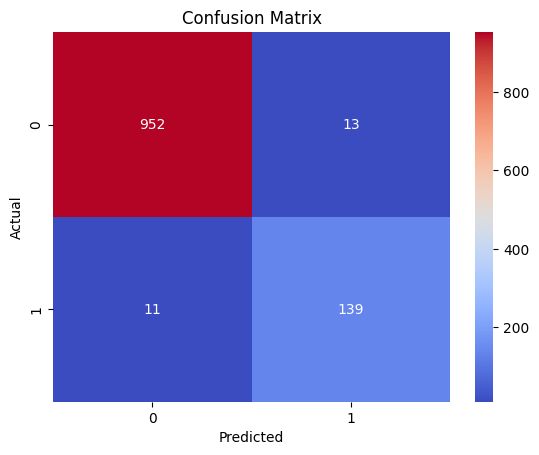

In [10]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [11]:
def predict_message(msg):
    vec_msg = cv.transform([msg])
    result = model.predict(vec_msg)
    return "Spam" if result[0] == 1 else "Not Spam"

# Test
predict_message("Congratulations! You won a $1000 Walmart gift card. Click here to claim.")


'Spam'

In [12]:
import joblib
joblib.dump(model, "spam_detector_model.pkl")
joblib.dump(cv, "vectorizer.pkl")


['vectorizer.pkl']